In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from sklearn.datasets import make_swiss_roll
from matplotlib.colors import LinearSegmentedColormap

from ManifoldDiffusionGeometry import *
from paper_utils import *
from Visualise import *

from Other_methods.HickokBlumberg.curvature import scalar_curvature_est as HickokBlumberg
from Other_methods.HickokBlumberg.manifold import Hyperboloid

import plotly.graph_objects as go
import skdim
# import matlab.engine
# eng = matlab.engine.start_matlab()
# eng.cd(r'Other_methods/SritharanWangHormoz', nargout=0)
# SritharanWangHormoz = eng.manifold_curvature

In [3]:
benchmark = skdim.datasets.BenchmarkManifolds(random_state=0, )
benchmark.truth

Intrinsic Dimension Number of variables  \
M1_Sphere                          10                  11   
M2_Affine_3to5                      3                   5   
M3_Nonlinear_4to6                   4                   6   
M4_Nonlinear                        4                   8   
M5a_Helix1d                         1                   3   
M5b_Helix2d                         2                   3   
M6_Nonlinear                        6                  36   
M7_Roll                             2                   3   
M8_Nonlinear                       12                  72   
M9_Affine                          20                  20   
M10a_Cubic                         10                  11   
M10b_Cubic                         17                  18   
M10c_Cubic                         24                  25   
M10d_Cubic                         70                  71   
M11_Moebius                         2                   3   
M12_Norm                           20                  20   
M13a_Scurve                         2                   3   
M13b_Spiral                         1                  13   
Mbeta                              10                  40   
Mn1_Nonlinear                      18                  72   
Mn2_Nonlinear                      24                  96   
Mp1_Paraboloid                      3                  12   
Mp2_Paraboloid                      6                  21   
Mp3_Paraboloid                      9                  30   

                                                         Description  
M1_Sphere                               10D sphere linearly embedded  
M2_Affine_3to5                                          Affine space  
M3_Nonlinear_4to6      Concentrated figure, mistakable with a 3D one  
M4_Nonlinear                                      Nonlinear manifold  
M5a_Helix1d                                                 1D helix  
M5b_Helix2d                                                 2D helix  
M6_Nonlinear                                      Nonlinear manifold  
M7_Roll                                                   Swiss Roll  
M8_Nonlinear                      Nonlinear (highly curved) manifold  
M9_Affine                                               Affine space  
M10a_Cubic                                             10D hypercube  
M10b_Cubic                                             17D hypercube  
M10c_Cubic                                             24D hypercube  
M10d_Cubic                                             70D hypercube  
M11_Moebius                            Möebius band 10-times twisted  
M12_Norm                             Isotropic multivariate Gaussian  
M13a_Scurve                                               2D S-curve  
M13b_Spiral                                           1D helix curve  
Mbeta              Manifold generated with a smooth nonuniform pd...  
Mn1_Nonlinear      Nonlinearly embedded manifold of high ID (see ...  
Mn2_Nonlinear      Nonlinearly embedded manifold of high ID (see ...  
Mp1_Paraboloid     3D paraboloid, nonlinearly embedded in (3(3+1)...  
Mp2_Paraboloid     6D paraboloid, nonlinearly embedded in (3*(6+1...  
Mp3_Paraboloid     9D paraboloid, nonlinearly embedded in (3*(9+1...

### Create curvature figures

In [3]:
data = Hyperboloid.sample(1000)
S = Scalar_Curvature(data, d=2)

print(np.absolute(S).max())
range_col = [-np.absolute(S).max(),np.absolute(S).max()]
fig1= plot_scalar_3d(data, S, range_col, [3,8,2], 0.7)
fig1.show()

0.5335784277198331


In [4]:
data = Sphere(1,5000)

top_half = data[data[:,2] > 0]
x,y,_ = top_half.T
z = np.sqrt(1 - x**2 - y**2) - 0.6 * np.exp(-(x**2 + y**2)/0.5**2)
data = np.concatenate((data[data[:,2] < 0], np.stack((x,y,z), axis=1)))

S = Scalar_Curvature(data, d=2, n0=100)
print(np.absolute(S).max())
range_col = [-np.absolute(S).max(),np.absolute(S).max()]
fig2 = plot_scalar_3d(data, S, range_col, [3,3,2.8], zoom = 4.2)
fig2.show()

11.411812863670956


In [ ]:
range_col = [-np.absolute(S).max(),np.absolute(S).max()]
fig2 = plot_scalar_3d(data, S, range_col, [3,3,2.4], zoom = 4., centre=[0,0,0.15])
fig2.show()

In [ ]:
data = benchmark.generate(n = 4000, noise = 0.1)['M7_Roll']
S = Scalar_Curvature(data, d=2)
print(np.absolute(S).max())
range_col = [-1,1]
fig3= plot_scalar_3d(data, S, range_col, [3,8,2], 0.12, centre=[0,0,0.05])
fig3.show()

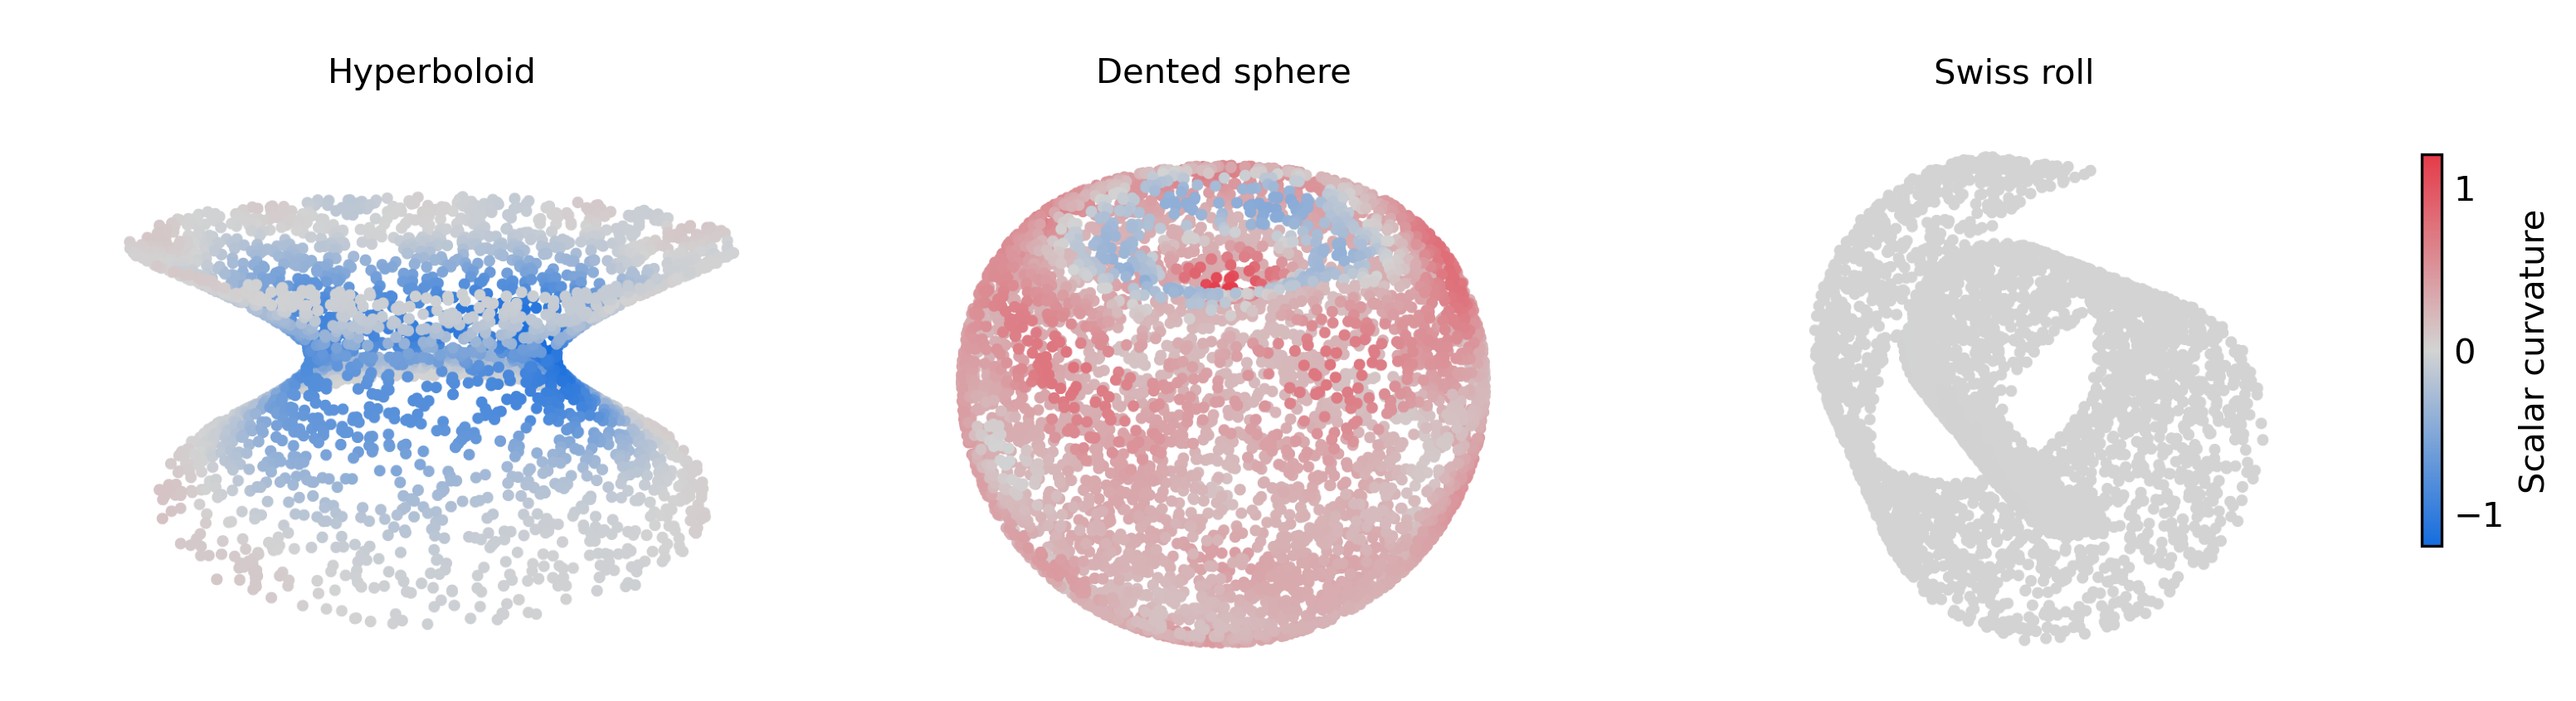

In [207]:
from PIL import Image
import io
import matplotlib.cm as cm
import matplotlib.colors as mcolors

fig, ax = plt.subplots(1,3, 
                       figsize = (15,3.2),
                       dpi = 300)

ax[0].imshow(fig_array(fig1))
ax[0].text(0.5, 0.95, 
             'Hyperboloid', 
             fontsize = 10,
              ha='center', va='top', transform=ax[0].transAxes)

ax[1].imshow(fig_array(fig2))
ax[1].text(0.5, 0.95, 
             'Dented sphere', 
             fontsize = 10,
              ha='center', va='top', transform=ax[1].transAxes)

ax[2].imshow(fig_array(fig3))
ax[2].text(0.5, 0.95, 
             'Swiss roll', 
             fontsize = 10,
              ha='center', va='top', transform=ax[2].transAxes)

fig.tight_layout(w_pad = -30, h_pad = -2.5)
for a in ax:
    a.axis('off')

# Define a color scale manually
cmap = mcolors.LinearSegmentedColormap.from_list("my_cmap", ["#166dde", "#d3d3d3", "#e53b4a"])
norm = mcolors.Normalize(vmin=-1.2, vmax=1.2)  # Manually set range for the colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = fig.colorbar(sm, ax=ax, orientation='vertical', fraction=0.08, pad=0, shrink = 0.6,
                    label = 'Scalar curvature',
                    ticks = [-1,0,1])
cbar.ax.tick_params(size=0)

In [ ]:
r = 1
R = 2

data_1 = Torus(r, R, n = 3000, sigma=0.)
S_1 = Scalar_Curvature(data_1, d=2)

range_color=[-2, 2]
fig_torus_1= plot_scalar_3d_torus(data_1, S_1, [3,3,2.5], zoom = 1.3)
fig_torus_1.show()
ground_truth_torus_1 = plot_ground_truth_torus(r, R, data_1, S_1)


In [ ]:
data_2 = Torus(r, R, n = 1000, sigma=0.1)
S_2 = Scalar_Curvature(data_2, d=2)

range_color=[-2, 2]
fig_torus_2= plot_scalar_3d_torus(data_2, S_2, [3,3,2.5], zoom = 1.3)
fig_torus_2.show()
ground_truth_torus_2 = plot_ground_truth_torus(r, R, data_2, S_2)

In [ ]:
data_3 = Torus(r, R, n = 600, sigma=0.15)
S_3 = Scalar_Curvature(data_3, d=2)

fig_torus_3= plot_scalar_3d_torus(data_3, S_3, [3,3,2.5], zoom = 1.3)
fig_torus_3.show()
ground_truth_torus_3 = plot_ground_truth_torus(r, R, data_3, S_3)

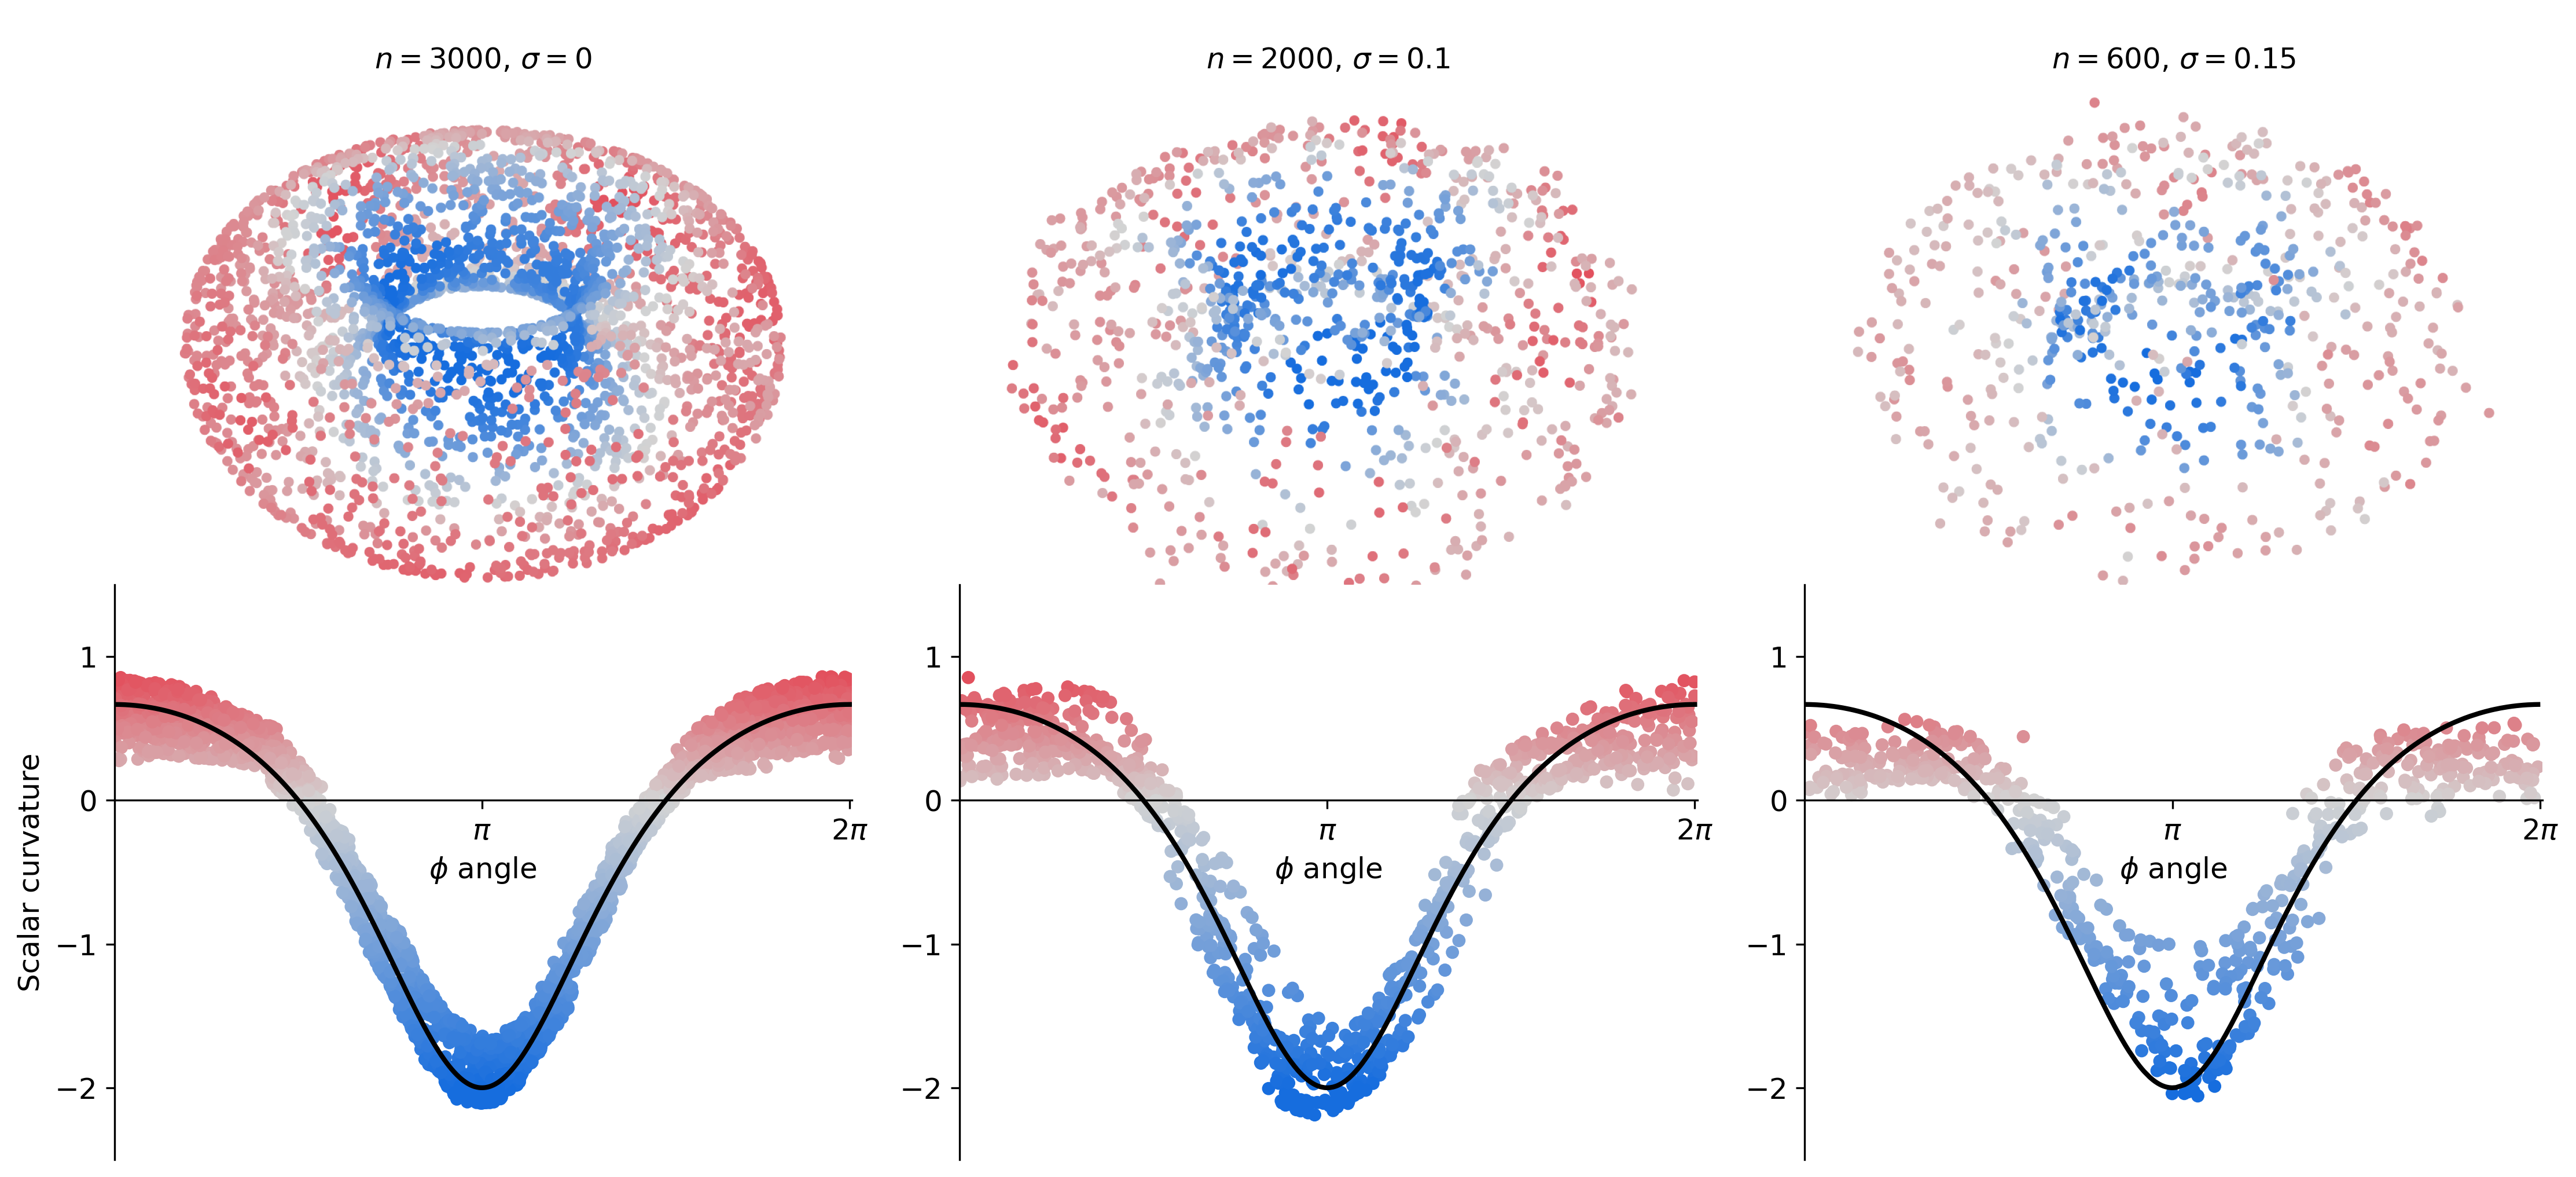

In [280]:
fig, ax = plt.subplots(2,3, 
                       figsize = (15,7),
                       dpi = 300)

ax[0,0].imshow(fig_array(fig_torus_1))
ax[0,0].text(0.5, 0.95, 
             r'$n=3000$, $\sigma = 0$', 
              ha='center', va='top', transform=ax[0,0].transAxes)

ax[0,1].imshow(fig_array(fig_torus_2))
ax[0,1].text(0.5, 0.95, 
             r'$n=2000$, $\sigma = 0.1$', 
              ha='center', va='top', transform=ax[0,1].transAxes)

ax[0,2].imshow(fig_array(fig_torus_3))
ax[0,2].text(0.5, 0.95, 
             r'$n=600$, $\sigma = 0.15$',
              ha='center', va='top', transform=ax[0,2].transAxes)

plot_ground_truth_torus_axis(r, R, data_1, S_1, ax[1,0])

plot_ground_truth_torus_axis(r, R, data_2, S_2, ax[1,1])
# ax[1,1].yaxis.set_visible(False)
# ax[1,1].spines['left'].set_visible(False)
ax[1,1].set_ylabel('')

plot_ground_truth_torus_axis(r, R, data_3, S_3, ax[1,2])
# ax[1,2].yaxis.set_visible(False)
# ax[1,2].spines['left'].set_visible(False)
ax[1,2].set_ylabel('')

fig.tight_layout(
    # w_pad = -30, 
    h_pad = -1.8
    )
for a in ax[0]:
    a.axis('off')

# Define a color scale manually
# cmap = mcolors.ListedColormap(["black", "#e53b4a", "#8ab6ee", "#d3d3d3"])
# norm = mcolors.Normalize(vmin=-0.5, vmax=3.5)  # Manually set range for the colorbar
# sm = cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([])

plt.rcParams.update({'font.size': 14})

# cbar = fig.colorbar(sm, ax=ax, orientation='vertical', fraction=0.08, pad=0.02, shrink = 0.6,
#                     label = 'Dimension',
#                     ticks = [0,1,2,3])
# cbar.ax.tick_params(size=0)

### Run tests for scalar curvature computation on a torus.

In [2]:
r = 1
R = 2

diffusion_means = []
SWH_means1 = []
SWH_means2 = []
diffusion_stds = []
SWH_stds1 = []
SWH_stds2 = []

numbers = [300,400,600,800,1000,2000,5000,8000]
sigmas = [0,0.01,0.02,0.05,0.1,0.15,0.2,0.25]

for n in numbers:
    print(n)
    diffusion_n_means = []
    SWH_n_means1 = []
    SWH_n_means2 = []
    diffusion_n_stds = []
    SWH_n_stds1 = []
    SWH_n_stds2 = []
    for sigma in sigmas:
        # print(n,sigma)
        diffusion_runs = []
        SWH_runs1 = []
        SWH_runs2 = []
        for runs in range(1):
            data = Torus(r, R, n, sigma)
            error_diffusion, error_SWH_1, error_SWH_2 = test_gaussian_torus(data, r, R, se1=0.02, se2=0.1, n0=40)
            diffusion_runs.append(error_diffusion)
            SWH_runs1.append(error_SWH_1)
            SWH_runs2.append(error_SWH_2)
        diffusion_n_means.append(np.mean(diffusion_runs,axis=0))
        SWH_n_means1.append(np.mean(SWH_runs1,axis=0))
        SWH_n_means2.append(np.mean(SWH_runs2,axis=0))
        diffusion_n_stds.append(np.std(diffusion_runs,axis=0))
        SWH_n_stds1.append(np.std(SWH_runs1,axis=0))
        SWH_n_stds2.append(np.std(SWH_runs2,axis=0))
    diffusion_means.append(diffusion_n_means)
    SWH_means1.append(SWH_n_means1)
    SWH_means2.append(SWH_n_means2)
    diffusion_stds.append(diffusion_n_stds)
    SWH_stds1.append(SWH_n_stds1)
    SWH_stds2.append(SWH_n_stds2)

diffusion_means = np.array(diffusion_means)
SWH_means1 = np.array(SWH_means1)
SWH_means2 = np.array(SWH_means2)
diffusion_stds = np.array(diffusion_stds)
SWH_stds1 = np.array(SWH_stds1)
SWH_stds2 = np.array(SWH_stds2)

300
Starting parallel pool (parpool) using the 'Processes' profile ...
Connected to parallel pool with 8 workers.
400
600
800
1000
2000
5000
8000


MAE


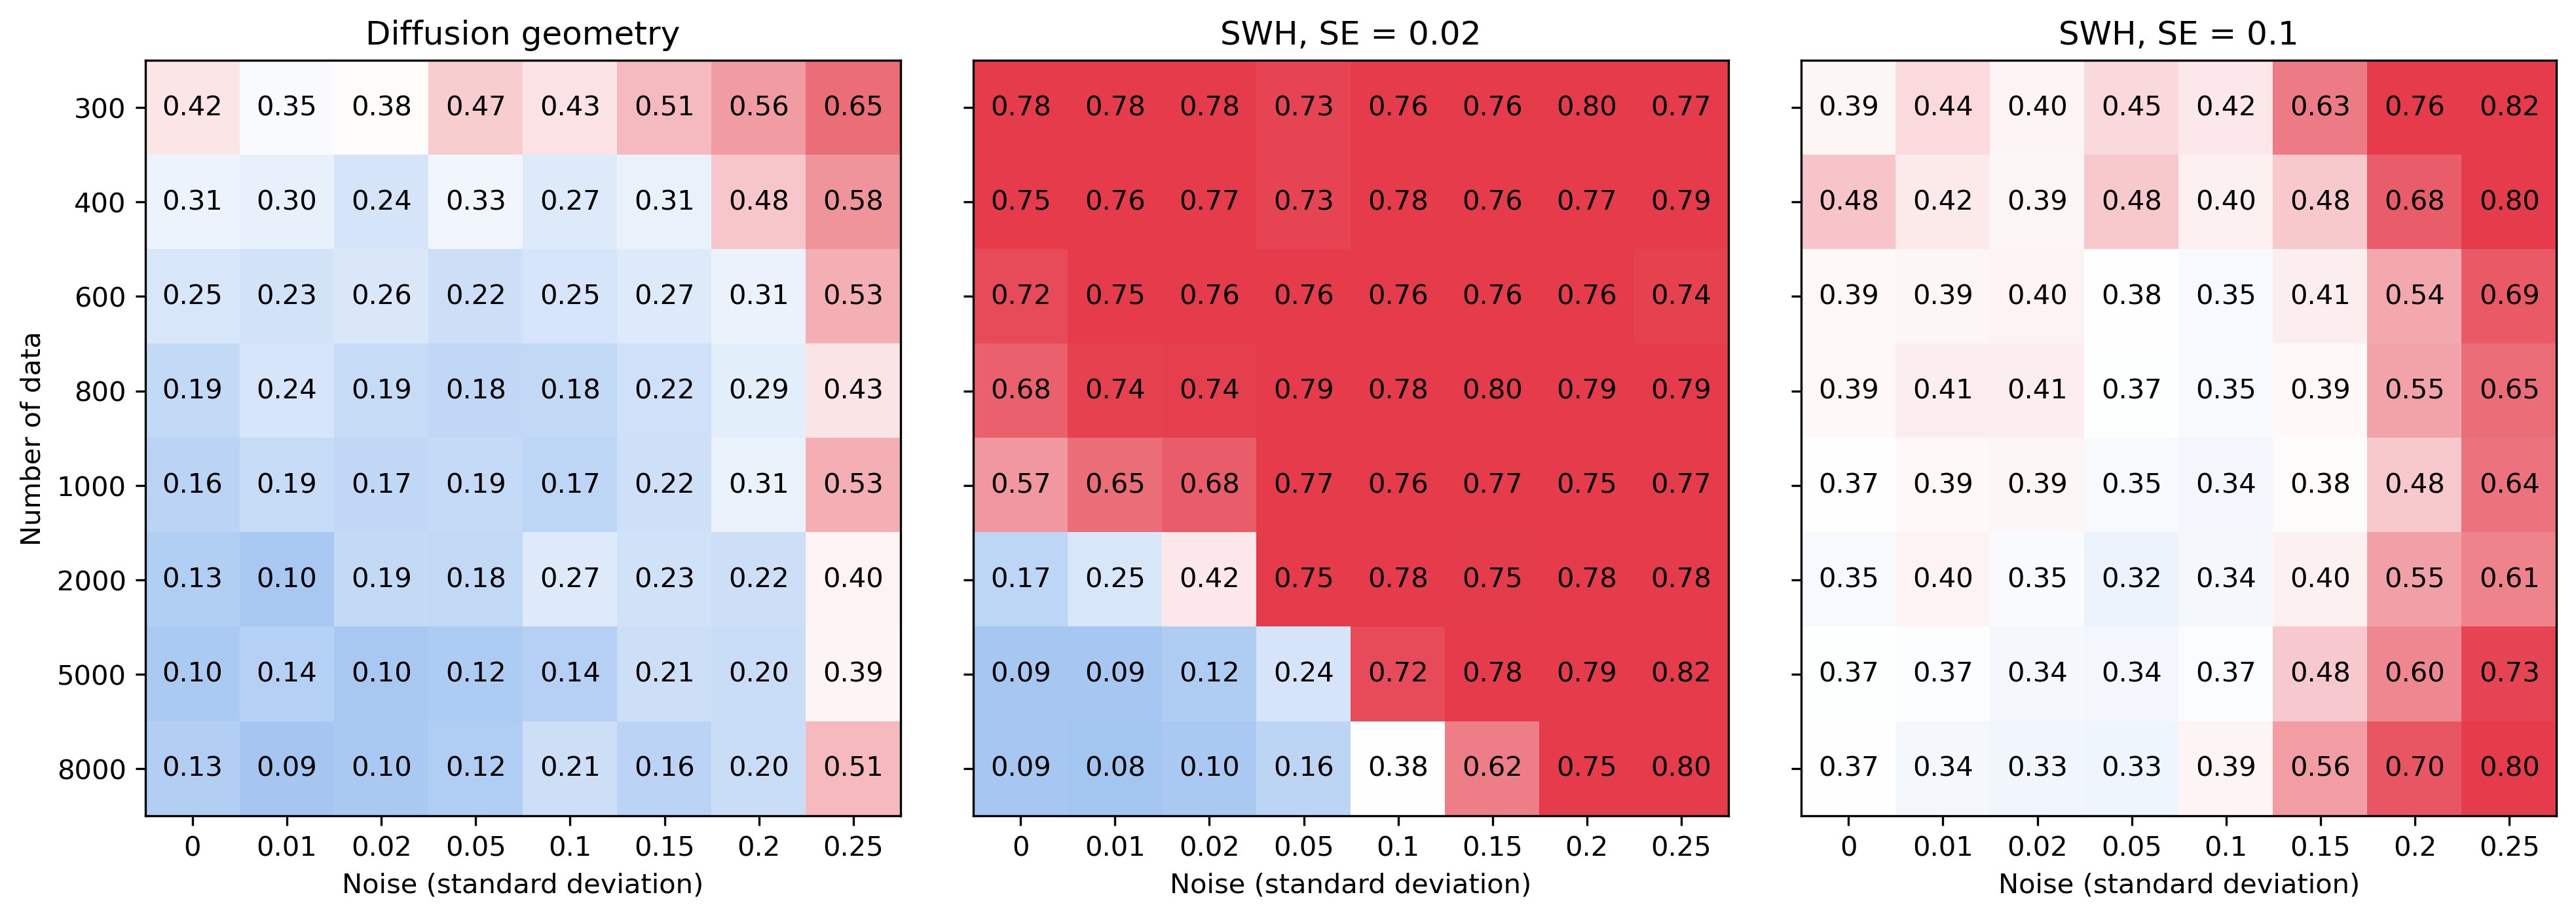

In [10]:
def heatmap(means_list, titles, numbers, sigmas, vmax):

    colors = [(0, "#8ab6ee"), 
              (0.5, 'white'), 
              (1, "#e53b4a")]
    cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

    n_means = len(means_list)
    size = 13

    fig, axs = plt.subplots(1,n_means, 
                            figsize = (size, n_means*size),
                            sharey=True,
                            dpi = 300)
    plt.tight_layout()
    
    for n, ax in enumerate(axs):
        means = means_list[n]
        ax.imshow(means, vmin=0, vmax = vmax, cmap=cmap)
        for i in range(means.shape[0]):
            for j in range(means.shape[1]):
                ax.text(j, i, f'{means[i, j]:.2f}', ha='center', va='center', color='black')

        ax.set_yticks(ticks=np.arange(len(numbers)), labels=numbers)
        ax.set_xticks(ticks=np.arange(len(sigmas)), labels=sigmas)

        ax.set_xlabel('Noise (standard deviation)')
        # ax.xaxis.set_ticks_position('top')
        ax.set_title(titles[n])
    axs[0].set_ylabel('Number of data')

    return fig, ax


print('MAE')
heatmap([diffusion_means[:,:,0],SWH_means1[:,:,0],SWH_means2[:,:,0]], 
        ['Diffusion geometry', 'SWH, SE = 0.02', 'SWH, SE = 0.1'],
        numbers, sigmas, vmax=0.75)
plt.show()
# print('RMSE')
# heatmap([diffusion_means[:,:,1]**0.5,SWH_means1[:,:,1]**0.5,SWH_means2[:,:,1]**0.5], 
#         ['Diffusion geometry', 'SWH, SE = 0.02', 'SWH, SE = 0.1'],
#         numbers, sigmas)
# plt.show()
# print('MSE')
# heatmap([diffusion_means[:,:,1],SWH_means1[:,:,1],SWH_means2[:,:,1]], 
#         ['Diffusion geometry', 'SWH, SE = 0.02', 'SWH, SE = 0.1'],
#         numbers, sigmas)
# plt.show()

### Make intro figure

In [ ]:
X = np.random.uniform(-1,1,size=(5000,2))
norms = np.linalg.norm(X, axis = 1)

def mexican_hat_wavelet(t, sigma=1.0):
    C = 2 / (np.sqrt(3 * sigma) * np.pi**0.25)  # normalization constant
    return C * (1 - (t**2 / sigma**2)) * np.exp(-t**2 / (2 * sigma**2))

Z = mexican_hat_wavelet(norms, sigma = 0.3)
data = np.hstack((X,Z.reshape(-1,1)/3))


# fig = px.scatter_3d(x = data[:,0],
#               y = data[:,1],
#               z = data[:,2])
# fig.update_traces(marker=dict(size = 2, color='black'))
# fig.show()

# range_limit = 0.85*np.absolute(scalar).max()
# range_col = [-range_limit, range_limit]
angle = [0,4,1.4]
zoom = 2.4

pointwise_dimensions = Dimension_Estimate(data, n0=120)[1]

fig_dimension = plot_dims_3d(data, pointwise_dimensions, angle, zoom)
fig_dimension.update_layout(width=1000, height=700, margin=dict(l=0, r=0, t=0, b=0))
fig_dimension.show()


In [ ]:

X = np.random.uniform(-1,1,size=(1500,2))
norms = np.linalg.norm(X, axis = 1)

Z = mexican_hat_wavelet(norms, sigma = 0.3)
data = np.hstack((X,Z.reshape(-1,1)/3))

bundle = Tangents(data, n0 = 150)

fig_bundle = plot_tangent_planes_3d(bundle, data, angle = angle, zoom = 1.03*zoom)
fig_bundle.show()


In [ ]:

X = np.random.uniform(-1,1,size=(3000,2))
norms = np.linalg.norm(X, axis = 1)

Z = mexican_hat_wavelet(norms, sigma = 0.3)
data = np.hstack((X,Z.reshape(-1,1)/3))

scalar = Scalar_Curvature(data, 2, n0=150)
range_limit = 0.85*np.absolute(scalar).max()
range_col = [-range_limit, range_limit]

fig_scalar = plot_scalar_3d(data, scalar, range_col = range_col, angle = angle, zoom = zoom)
fig_scalar.show()

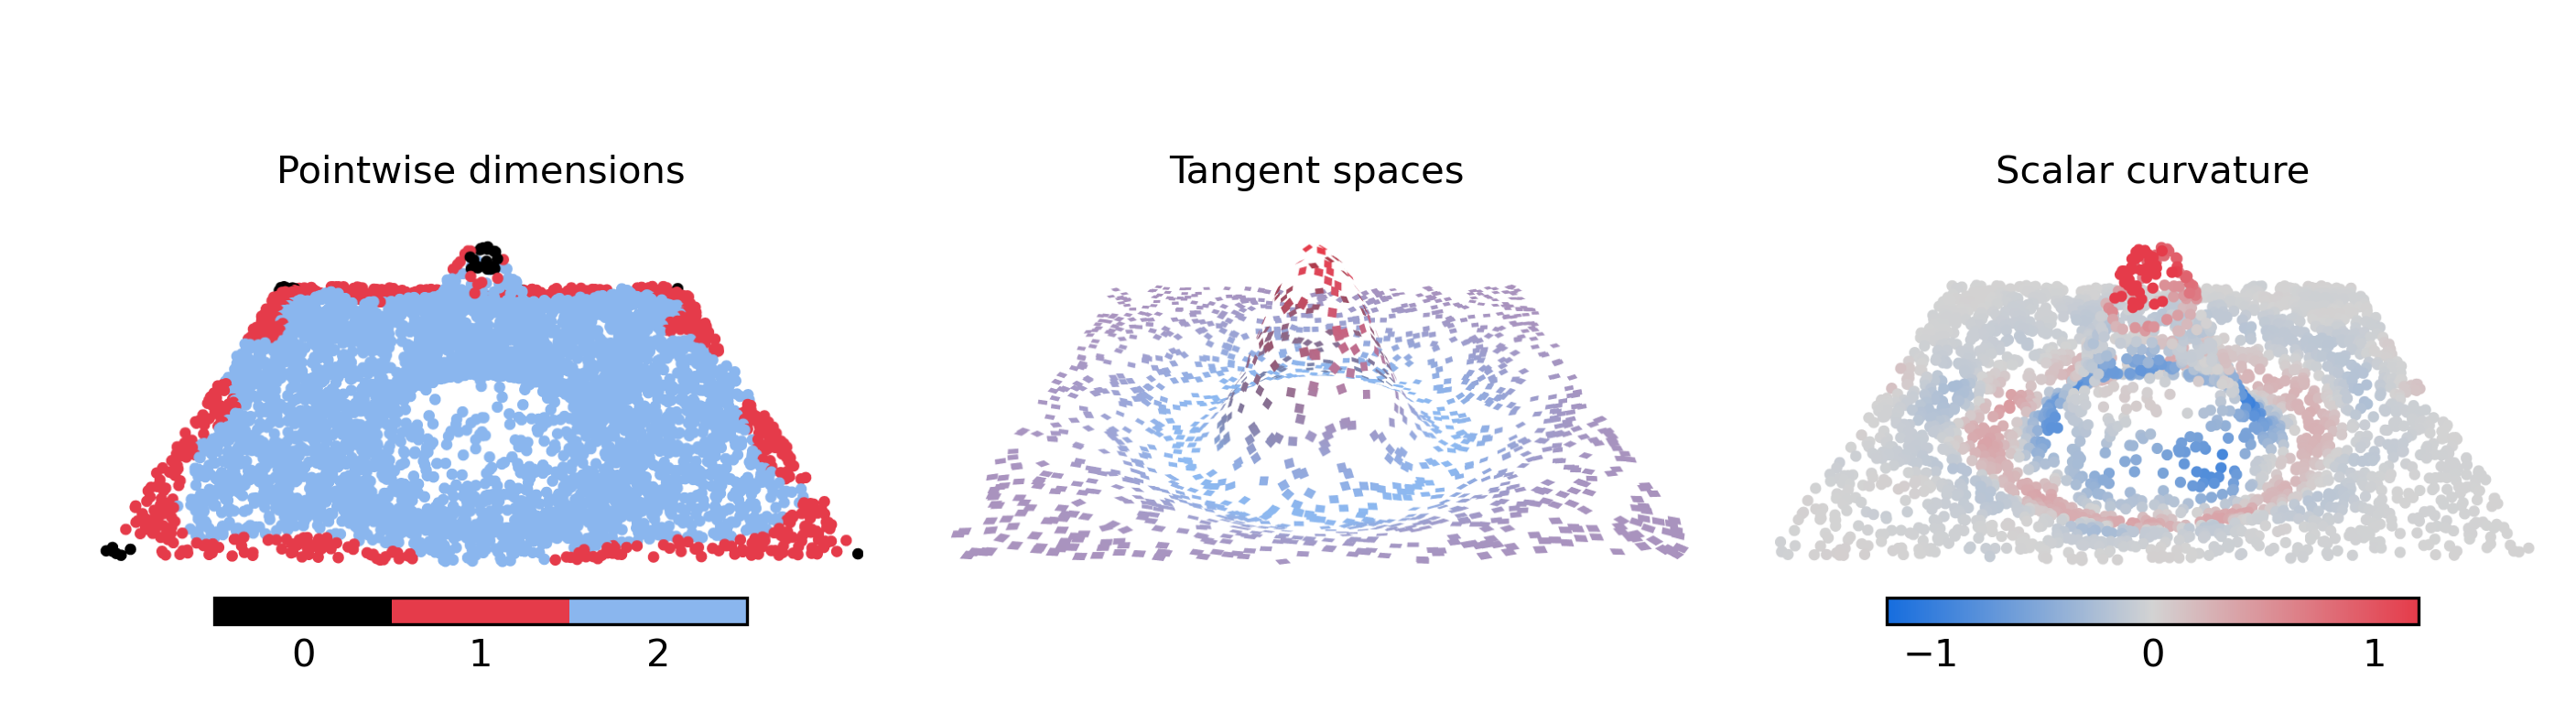

In [196]:
from PIL import Image
import io
import matplotlib.cm as cm
import matplotlib.colors as mcolors
def fig_array(fig):
    # fig.show()
    fig_image = fig.to_image(format='png')
    return np.array(Image.open(io.BytesIO(fig_image)))

fig, ax = plt.subplots(1,3, 
                       figsize = (15,3),
                       dpi = 300)

ax[0].imshow(fig_array(fig_dimension))
ax[0].text(0.5, 0.8, 
             'Pointwise dimensions', 
             fontsize = 10,
              ha='center', va='top', transform=ax[0].transAxes)

ax[1].imshow(fig_array(fig_bundle))
ax[1].text(0.5, 0.8, 
             'Tangent spaces', 
             fontsize = 10,
              ha='center', va='top', transform=ax[1].transAxes)

ax[2].imshow(fig_array(fig_scalar))
ax[2].text(0.5, 0.8, 
             'Scalar curvature', 
             fontsize = 10,
              ha='center', va='top', transform=ax[2].transAxes)


# fig.tight_layout(w_pad = -29.5)
plt.subplots_adjust(wspace=-0.45)
for a in ax:
    a.axis('off')


# Define a color scale manually
cmap = mcolors.ListedColormap(["black", "#e53b4a", "#8ab6ee"])
norm = mcolors.Normalize(vmin=-0.5, vmax=2.5)  # Manually set range for the colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = fig.colorbar(sm, ax=ax[0], orientation='horizontal', fraction=0.1, pad=-0.1, shrink = 0.35,
                    # label = 'Dimension',
                    ticks = [0,1,2])
cbar.ax.tick_params(size=0)

# Define a color scale manually
cmap = mcolors.LinearSegmentedColormap.from_list("my_cmap", ["#166dde", "#d3d3d3", "#e53b4a"])
norm = mcolors.Normalize(vmin=-1.2, vmax=1.2)  # Manually set range for the colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = fig.colorbar(sm, ax=ax[2], orientation='horizontal', fraction=0.1, pad=-0.1, shrink = 0.35,
                    # label = 'Scalar curvature',
                    ticks = [-1,0,1])
cbar.ax.tick_params(size=0)

cbar = fig.colorbar(sm, ax=ax[1], orientation='horizontal', fraction=0.1, pad=-0.1, shrink = 0.35,
                    # label = 'Scalar curvature',
                    ticks = [-1,0,1])
cbar.ax.set_visible(False)